# 1.5. Tabela de Distribuição de Frequência


Creation on August 9 2021.

Last modification on September 03 2022.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

__O que é uma Tabela de Distribuição de Frequência?__

Uma tabela de distribuição de frequência tem por objetivo organizar o conjunto de dados sobre uma variável em uma grupos (que será chamado de classes), onde a partir de suas frquências pode-se de obter algumas informações, de outra forma, "[...] conhecer o _comportamento_ dessa variável, analisando a ocorrência de suas possíveis realizações."(BUSSAB e MORETTIN, 2004)

Importar as bibliotecas

In [138]:
import numpy as np
import pandas as pd
from math import sqrt,ceil
from statistics import mean, median, mode, pstdev
import matplotlib.pyplot as plt
import matplotlib.style as style

In [139]:
style.use('seaborn')

## Variável qualitativa ordinal

Definir o conjunto de dados.

Neste exemplo trata-se de um conjunto de dados de 40 funcionários da Empresa A.

In [140]:
employees = ['Médio', 'Médio', 'Médio', 'Médio','Médio', 'Superior', 'Técnico', 'Médio', 'Técnico', 
             'Superior', 'Médio', 'Médio', 'Médio', 'Técnico', 'Superior', 'Médio', 'Fundamental', 'Médio', 
             'Superior', 'Técnico', 'Médio', 'Médio', 'Fundamental', 'Técnico', 'Médio', 'Superior', 'Médio', 
             'Médio', 'Técnico', 'Técnico', 'Superior', 'Médio', 'Médio', 'Fundamental', 'Superior', 'Médio', 
             'Superior', 'Fundamental', 'Médio', 'Superior']

A melhor forma de obter informações desse conjunto de dados é contruir diretamente a tabela de dados, porém com os dados ainda na forma bruta podemos obter a marca ou marcas de maior ocorrência a partir da moda.

In [141]:
mode(employees)

'Médio'

Devido a variável ser uma varíavel qualitativa não é possível calcular a média e a mediana. Além disso, a informação do que ambas representam não traz muito significado para o tipo de variável analisada.

Ao aplicarmos o cálculo da moda, vemos que para esse conjunto de dados o nível médio é o que tem maior ocorrência em todo o conjunto, o que mostra que o nível médio é a escolaridade com maior ocorrência.

__Atenção:__ Para construir a tabela de distribuição de frequência precisamos compreender a classificação da nossa variável, recomenda-se a leitura do _notebook_ sobre classificação de variáveis <link>. A variável do exemplo dado, sobre a escolaridade de 40 funcionários da Empresa A é uma varíavel do tipo qualitativa ordinal.

Por se tratar de uma varável qualitativa não calcularemos o número de classes e a amplitude total, pois os níveis de escolaridade serão as proprias classes da tabela.

In [142]:
scholarity = list(pd.DataFrame(employees).groupby(by=0).count()[:].reset_index()[0])

In [143]:
scholarity

['Fundamental', 'Médio', 'Superior', 'Técnico']

In [144]:
#fi: absolute frequency
fi = {}
for value in scholarity:
    frequency = 0
    for employee in employees:
        if employee == value:
            frequency += 1
    fi[value] = frequency

In [145]:
swap = fi['Superior']
del fi['Superior']
fi['Superior'] = swap

In [146]:
fi

{'Fundamental': 4, 'Médio': 20, 'Técnico': 7, 'Superior': 9}

In [147]:
index = list(fi.keys())

In [148]:
data = list(fi.values())

In [149]:
fi_relative = []
for value in data:
    element = np.around((value / sum(data)), 2)
    element = element * 100
    fi_relative.append(element)

Diferente da variável do tipo qualitativa nominal, as frequências acumuladas trazem informações relevantes para a análise.

Vamos criar uma lista com a frequência absoluta acumulada.

In [150]:
fi_accumulated = [data[0]]
for value in range(1, len(data)):
    element = fi_accumulated[value - 1] + data[value]
    fi_accumulated.append(element)

In [151]:
frequency_distribution = pd.DataFrame(index=index, data=data, columns=['Fi'])
frequency_distribution['Fi (%)'] = fi_relative
frequency_distribution['Fi Acumulado'] = fi_accumulated

In [152]:
frequency_distribution

,Fi,Fi (%),Fi Acumulado
Fundamental,4,10.0,4
Médio,20,50.0,24
Técnico,7,18.0,31
Superior,9,22.0,40


Criar um gráfico em barras com as informações da tabela.

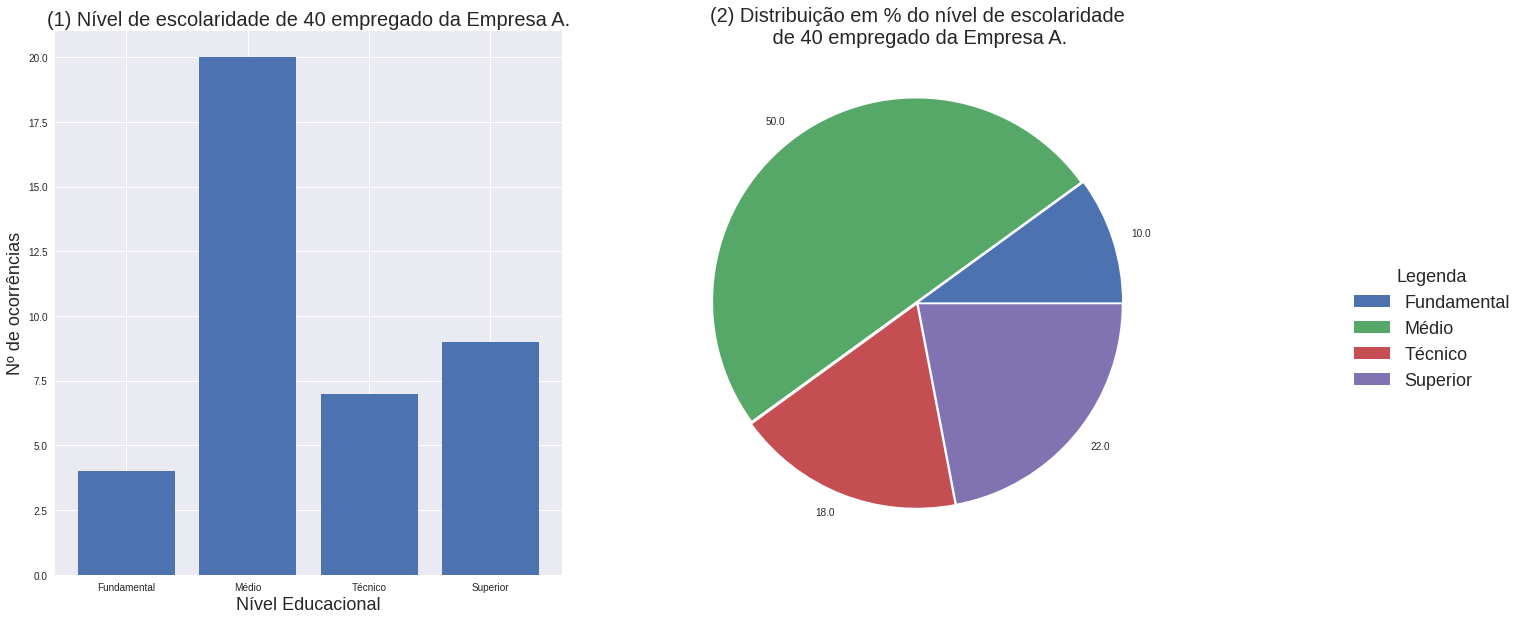

In [153]:
figure = plt.figure(figsize=(20,10))
axes = figure.subplots(nrows=1, ncols=2)

axes[0].bar(frequency_distribution.index, frequency_distribution['Fi'])
axes[0].set_title('(1) Nível de escolaridade de 40 empregado da Empresa A.', fontsize=20)
axes[0].set_ylabel('Nº de ocorrências', fontsize=18)
#axes[0].get_yticks(fontsize=18)
axes[0].set_xlabel('Nível Educacional', fontsize=18)
#axes[0].get_xticks(fontsize=18)

axes[1].pie(frequency_distribution['Fi (%)'], labels=frequency_distribution['Fi (%)'], 
            explode=(0.01, 0.01, 0.01, 0.01))
axes[1].set_title('(2) Distribuição em % do nível de escolaridade\n de 40 empregado da Empresa A.', 
                  fontsize=20)
axes[1].legend(bbox_to_anchor=(1.2, 0.5, 0.5, 0.1), title='Legenda', 
               labels=frequency_distribution.index, fontsize=18, title_fontsize=18)

Podemos visualizar a confirmação do valor da moda onde o nível médio é o que possui mais ocorrência no conjunto de dados, tanto no gráfico 1 onde mostra que nível médio obteve 20 ocorrências, quanto no gráfico 2 onde o nível médio possui 50% das ocorrências.

Além disso, podemos visualizar que os funcionários que possui nível técnico ou superior representam 40% das ocorrências.

In [158]:
print('{}% dos funcionários'.format(sum(frequency_distribution['Fi (%)'][2:])))

40.0% dos funcionários


Outra informação que poderia ser análisado seria a porcentagem de funcionários que possuem ao menos o ensino médio.

In [159]:
print('{}% dos funcionários'.format(sum(frequency_distribution['Fi (%)'][1:])))

90.0% dos funcionários


Vemos que 90% dos funcionarios possui ao menos o ensino médio.

Podemos saber quantos funcionários não possuem o ensino superior.

In [162]:
print('{} funcionários que representam {}% do total'.format(sum(frequency_distribution['Fi'][:2]), 
                                                            sum(frequency_distribution['Fi (%)'][:2])))

24 funcionários que representam 60.0% do total


Além disso, temos que alguns funcionários possuem apenas o nível fundamental, que conforme a tabela são:

In [163]:
print('{}% dos funcionários.'.format(frequency_distribution['Fi (%)']['Fundamental']))

10.0% dos funcionários.


## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.